# Klasifikasi Multikelas

Dalam halaman ini, terdapat data nama hewan dengan lengkap dengan ciri cirinya dalam bentuk boolean (0,1). Data hewan tersebut kemudian diklasifikasikan kedalam 7 kelas yang berbeda dengan bantuan library sklearn.

Credit Dataset:

https://archive.ics.uci.edu/ml/datasets/Zoo

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

## Memuat Dataset

In [36]:
data = pd.read_csv('zoo.csv')
display(data)

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


## Mempersiapkan Data Latih dan Data Uji

In [31]:
from sklearn.model_selection import train_test_split

X = data.drop(["animal name", "type"], axis = 1)
y = data[["type"]]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)
display(X_train)
display(y_train)
display(X_test)
display(y_test)

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
32,1,0,0,1,0,0,0,1,1,1,0,0,2,0,0,1
40,1,0,1,0,1,0,0,0,0,1,0,0,6,0,0,0
39,1,0,1,0,1,0,0,0,0,1,1,0,6,0,1,0
38,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0
46,0,0,1,0,0,1,1,0,0,0,0,0,6,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,1,0,0,1,0,1,1,1,1,1,0,1,2,1,0,1
9,1,0,0,1,0,0,0,1,1,1,0,0,4,0,1,0
72,0,0,0,0,0,0,1,0,0,1,1,0,8,1,0,0
12,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0


,type
32,1
40,6
39,6
38,4
46,7
...,...
75,1
9,1
72,7
12,4


,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
94,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,0
78,0,1,1,0,1,1,1,0,1,1,0,0,2,1,0,0
17,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
100,0,1,1,0,1,0,0,0,1,1,0,0,2,1,0,0
36,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,0
85,0,0,1,0,0,1,1,0,0,0,0,0,5,0,0,0
55,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
83,0,1,1,0,1,0,0,0,1,1,0,0,2,1,0,0
82,0,0,1,0,0,1,0,1,1,0,0,1,0,1,0,0
52,0,0,1,0,0,1,1,1,1,1,0,0,4,1,0,0


,type
94,1
78,2
17,1
100,2
36,1
85,7
55,1
83,2
82,4
52,5


### Kode tersebut menggunakan library sklearn untuk membagi dataset menjadi data latih (training data) dan data uji (testing data) dengan menggunakan fungsi train_test_split().

Pertama, kolom "animal name" dan "type" dihapus dari X dan dimasukkan ke dalam y.
Kemudian, dataset X dan y dibagi menjadi dua bagian, yaitu X_train dan y_train yang akan digunakan untuk melatih model dan X_test dan y_test yang akan digunakan untuk menguji model.
test_size adalah parameter yang digunakan untuk menentukan ukuran data uji yang ingin dipakai. Pada kasus ini, data uji sebesar 20% dari keseluruhan dataset (test_size=0.2).
random_state adalah parameter yang digunakan untuk menetapkan seed number sehingga hasil split dataset dapat direproduksi kembali jika parameter random_state yang sama digunakan di waktu yang berbeda.

## Membangun Model Klasifikasi

In [32]:
from sklearn.linear_model import LogisticRegression

# Define the classifier
logreg = LogisticRegression()

# Performing the model building
logreg.fit(X_train,y_train)

# Predicting the labels of the test dataset
y_pred=logreg.predict(X_test)

# Comparing the true labels vs predicted labels
compare = pd.DataFrame({"y_true": y_test["type"], "y_pred": y_pred})
display(compare)

C:\anaconda\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,y_true,y_pred
94,1,1
78,2,2
17,1,1
100,2,2
36,1,1
85,7,7
55,1,1
83,2,2
82,4,4
52,5,5


 Bagian tersebut merupakan implementasi dari pemodelan menggunakan regresi logistik dengan library sklearn. Secara lebih rinci, bagian tersebut melakukan hal-hal berikut:

from sklearn.linear_model import LogisticRegression: mengimpor library LogisticRegression yang digunakan untuk membangun model regresi logistik.
logreg = LogisticRegression(): mendefinisikan objek logreg sebagai model regresi logistik.
logreg.fit(X_train,y_train): melakukan pelatihan model dengan data latih X_train dan y_train menggunakan metode fit().
y_pred=logreg.predict(X_test): melakukan prediksi pada data uji X_test menggunakan metode predict() dan menyimpan hasil prediksi pada variabel y_pred.
compare = pd.DataFrame({"y_true": y_test["type"], "y_pred": y_pred}): membandingkan label sebenarnya y_test dengan label yang diprediksi y_pred dan menyimpan hasil perbandingan dalam variabel compare.
display(compare): menampilkan hasil perbandingan label sebenarnya dan label yang diprediksi dalam bentuk tabel.

## Membuat Confusion Matrix

Text(0.5, 427.9555555555555, 'Predicted label')

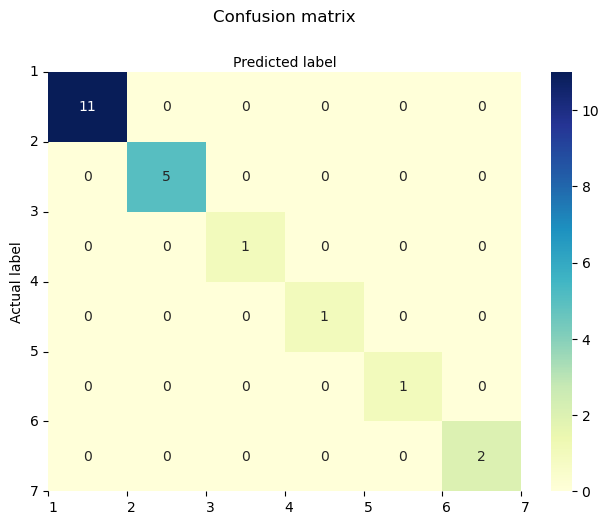

In [33]:
from sklearn import metrics

# Fungsi untuk menghitung confusion matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

### Berikut merupakan kode untuk memproduksi heatmap visualisasi confusion matrix

# Tuliskan label dari masing-masing kelas sesuai urutan
class_names = [1,2,3,4,5,6,7]

# Membangun heatmap
fig, ax = plt.subplots()
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, ha="left")
plt.yticks(tick_marks, class_names, rotation='horizontal')
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Bagian ini merupakan implementasi dari evaluasi model dengan menggunakan confusion matrix dan visualisasi confusion matrix menggunakan heatmap dari library seaborn dan matplotlib.

## Menampilkan Ukuran Performansi Klasifikasi

Dalam klasifikasi multi kelas, ukuran performasi seperti Accuracy, Precision, Recall, dan F1 dihitung nilainya untuk setiap label/kelas dari klasifikasi. Dengan demikian, ukuran performansi hasil model klasifikasi untuk suatu kelas mungkin bisa berbeda dibading ukuran untuk kelas lainnya.

In [34]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         2

    accuracy                           1.00        21
   macro avg       1.00      1.00      1.00        21
weighted avg       1.00      1.00      1.00        21



Bagian ini menggunakan library sklearn untuk menghasilkan classification report. classification_report() adalah fungsi yang digunakan untuk menghasilkan report dari precision, recall, f1-score, dan support untuk setiap kelas pada dataset.

Output dari classification_report() akan menampilkan beberapa metrik evaluasi pada setiap kelas, yaitu precision, recall, f1-score, dan support. Precision adalah rasio true positive terhadap true positive dan false positive. Recall adalah rasio true positive terhadap true positive dan false negative. F1-score adalah rata-rata harmonik dari precision dan recall. Support adalah jumlah sampel dalam masing-masing kelas pada data test.

Output dari classification_report() akan menghasilkan 3 kolom utama yaitu precision, recall, dan f1-score serta kolom support pada setiap kelas. Kolom precision menunjukkan tingkat ketepatan model dalam memprediksi kelas, sedangkan recall menunjukkan seberapa baik model dalam menemukan kelas yang benar. F1-score adalah rata-rata harmonik antara precision dan recall. Semakin besar nilai F1-score, semakin baik pula performa model dalam memprediksi suatu kelas. Sedangkan kolom support menunjukkan jumlah sampel yang ada di setiap kelas pada dataset.

Dengan menggunakan classification_report(), kita dapat memperoleh informasi yang lebih rinci mengenai performa model dalam memprediksi setiap kelas pada dataset.

## Membuat Kesimpulan Akhir

Berdasarkan nilai pada confusion matrix, dapat dilihat bahwa klasifikasi dengan menggunakan regresi logistik telah berjalan dengan sangat baik, yaitu model dapat memprediksi keseluruhan test data yang diberikan. Kelas yang menerima ukuran  performansi yang sempurna adalah semua kelas. Artinya model yang sudah ada cukup terandalkan untuk diterapkan untuk memprediksi label dari variabel input baru.

## Kontribusi

1. Rachel  : 33.333%
2. Samuel  : 33.333%
3. Stanley : 33.333%

# Komitmen Integritas

“Di hadapan TUHAN yang hidup, saya menegaskan bahwa saya tidak memberikan maupun
menerima bantuan apapun—baik lisan, tulisan, maupun elektronik—di dalam ujian ini selain
daripada apa yang telah diizinkan oleh pengajar, dan tidak akan menyebarkan baik soal
maupun jawaban ujian kepada pihak lain.”